#  XPCS   Pipeline 

 "This notebook corresponds to version {{ version }} of the pipeline tool: https://github.com/NSLS-II/pipelines"

## NSLS2 data retrieval imports

In [4]:
import sys, shutil
EssCod_PATH='/home/yuzhang/chx-pipelines/Develops/'
EssCod_PATH in sys.path or sys.path.append(EssCod_PATH)
from develop import * 

In [5]:
cd /home/yuzhang/chx-pipelines/Develops/

/home/yuzhang/chx-pipelines/Develops


In [6]:

%matplotlib notebook

### Lazy Eiger Handler (later will goto databroker)

### Get the events from the uid

In [7]:
uid = 'c423e856'

uid = '528bd8'
uid = '54614d43'
uid = '95782687'
uid= 'fa5fdae'

uid = 'ff9f20c0'
uid='71720966'
uid = '377dad97' # Deposition at 6 mTorr
#uid = 'bece0b55' # Presputter for 6 mTorr
uid = '4d82cc38'  # 10 mTorr 0.2 fps 2500 frames
uid = 'ffe9d518'  # 10 mTorr 0.2 fps 2500 frames
hdr = db[uid]

In [29]:
#hdr
import uuid
print(str(uuid.uuid4()))

278312f8-8a63-4d45-ac0c-5eb06a1c8d77


In [30]:
ev, = get_events(hdr, ['eiger_4M_cam_img_image_lightfield'], fill = True)

hdf5 path = /XF11ID/data/2015/11/8/3f84f57d-79b7-4a10-8b51_5_master.h5


In [31]:

dt = datetime.fromtimestamp(hdr['start'].time)
path ='/XF11ID/analysis' + '/%s/%s/%s/' % (dt.year, dt.month, dt.day)
path

'/XF11ID/analysis/2015/11/8/'

In [32]:
imgs = ev['data']['eiger_4M_cam_img_image_lightfield']
print (imgs)
Nimg=len(imgs)

<Frames>
Length: 15000 frames
Frame Shape: 2167 x 2070
Pixel Datatype: uint32


## load a mask if exist 
### otherwise create a mask using Mask pipeline

In [33]:

mask = np.load( path +  str(uid)+"_mask.npy")
 

### Plot the mask

<IPython.core.display.Javascript object>


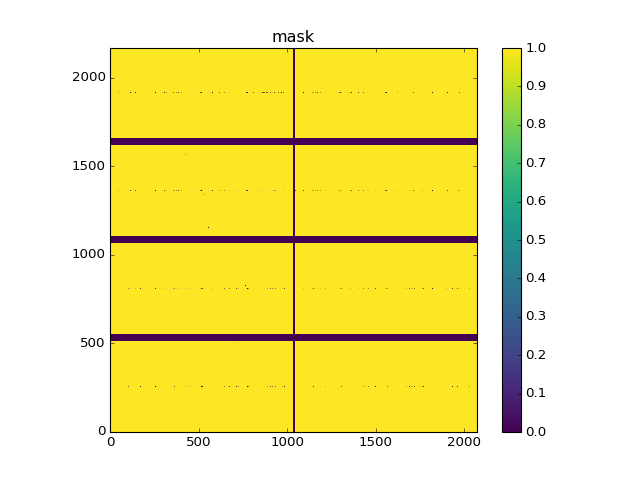

In [34]:
fig, ax = plt.subplots()
im = ax.imshow(mask, vmin=0,vmax=1,cmap='viridis', origin='lower')
ax.set_title( 'mask')
fig.colorbar( im )
plt.show()

# inverse the image coordinate

In [35]:
imgsr = Reverse_Coordinate(imgs, mask)    
#don't use imgsr[::1] , this command will load everything to the memory
 

In [36]:
imgsr[2499].max()

17255

## Interactive way to browse through images.

### Note : Provide the number of images that you want to browse

<IPython.core.display.Javascript object>


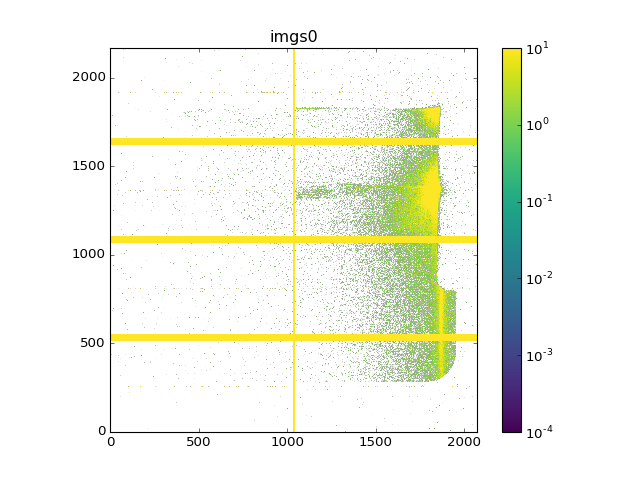

In [37]:
fig, ax = plt.subplots()

im=ax.imshow(imgs[0], origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=1E1))
fig.colorbar(im)
ax.set_title( 'imgs0')
plt.show()

<IPython.core.display.Javascript object>


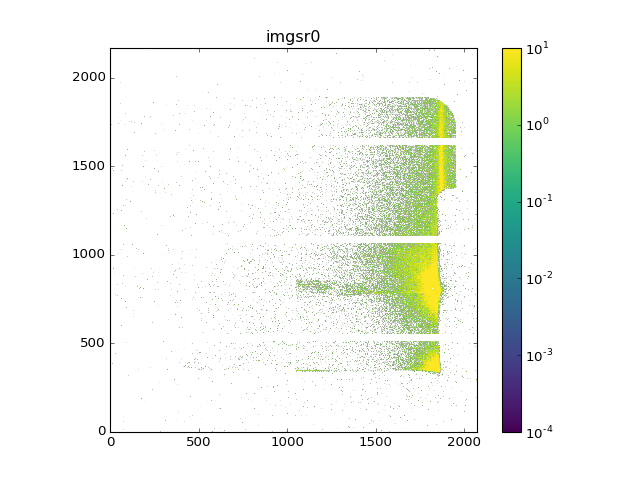

In [38]:
fig, ax = plt.subplots()

im=ax.imshow(imgsr[0], origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=1E1))
fig.colorbar(im)
ax.set_title( 'imgsr0')
plt.show()

In [40]:
import timeit

In [41]:
%timeit avg_img = np.average( imgs[good_start:good_end: 1], axis=0)

1 loops, best of 3: 6.1 s per loop


In [42]:
#interact(view_image, i=(0, Nimg-1))

In [43]:
#view_image_movie( imgsr,.1, 1000, 1001) 

### hey, let's see if any images are bad!

### Get the Averaged Image Data

In [44]:
good_start = 0
good_end= 100

avg_img = np.average( imgs[good_start:good_end: 1], axis=0) #*imgs.md['pixel_mask']  #*mask_rh

avg_img *=  mask

In [45]:
#avg_img = average_img( imgsr,0, 2000 )

In [46]:
avg_img  = avg_img[::-1,:] 

<IPython.core.display.Javascript object>


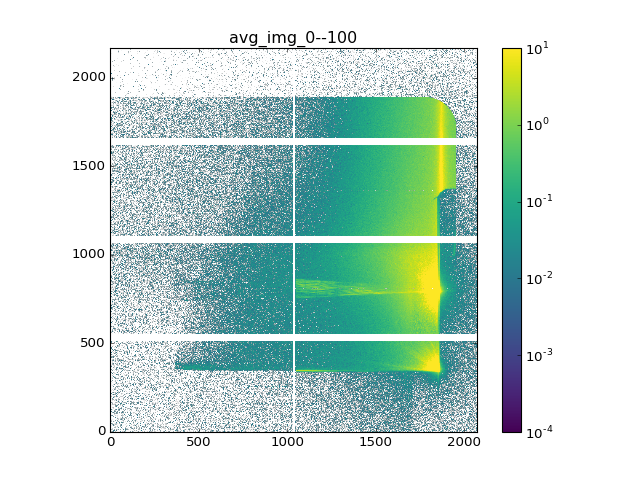

In [47]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(avg_img, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=1E1))
fig.colorbar(im)
ax.set_title( 'avg_img_%s--%s'%(good_start, good_end))
plt.show()

## Plot the averged image with the mask

In [48]:
print (avg_img.max())

12800.54


## Note:  experiment information 

* The physical size of the pixels
* Wavelegth of the X-rays  - (units in Angstroms)
* Detector to sample distance
* Exposure time - (units in seconds)
* acqusition period - (units in seconds)
* dead time - (units in seconds)
* time per frame = (exposure time + dead_time or acqusition period) - (units in seconds)

In [49]:
#imgs.md

In [50]:
# The physical size of the pixels
dpix = imgs.md['x_pixel_size'] * 1000.  
lambda_ = imgs.md['incident_wavelength']    # wavelegth of the X-rays in Angstroms
Ldet = 4810        # detector to sample distance (mm)

exposuretime= imgs.md['count_time']
acquisition_period = imgs.md['frame_time']

# deadtime= 0   # 60e-6 
# timeperframe = exposuretime + deadtime
timeperframe = acquisition_period  

timeperframe, exposuretime

(1.00001, 1.0)

## Import all the required packages for  Data Analysis

* scikit-xray - data analysis tools for X-ray science 
    - https://github.com/scikit-xray/scikit-xray
* xray-vision - plotting helper functions for X-ray science
    - https://github.com/Nikea/xray-vision


## Get the approximate center and see the statistic to make sure 

### Qz, Qr Average : to do!

# GiSAXS get q-map (qz and qr)

In [51]:
inc_x0 = 1871
inc_y0 = 339
refl_x0 = 1871
refl_y0 = 811      #1670
Lsd= 4.81
lamda= lambda_  #12.4/9

In [52]:
lamda

1.3776

In [53]:
#cd /home/yuzhang/chx-pipelines/Develops/

In [54]:
#%run develop.py

In [55]:
alphaf,thetaf, alphai, phi = get_reflected_angles( inc_x0, inc_y0,refl_x0 , refl_y0, Lsd=Lsd )

The incident_angle (alphai) is: 0.210835132612


In [56]:
qx, qy, qr, qz = convert_gisaxs_pixel_to_q( inc_x0, inc_y0,refl_x0,refl_y0, lamda=lamda, Lsd=Lsd )

The incident_angle (alphai) is: 0.210835132612


<IPython.core.display.Javascript object>


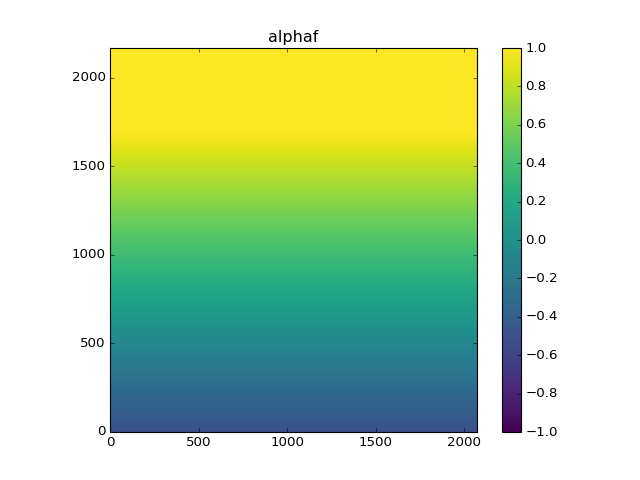

In [57]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(alphaf*180/np.pi, origin='lower' ,cmap='viridis',vmin=-1,vmax= 1 )
fig.colorbar(im)
ax.set_title( 'alphaf')
plt.show()

<IPython.core.display.Javascript object>


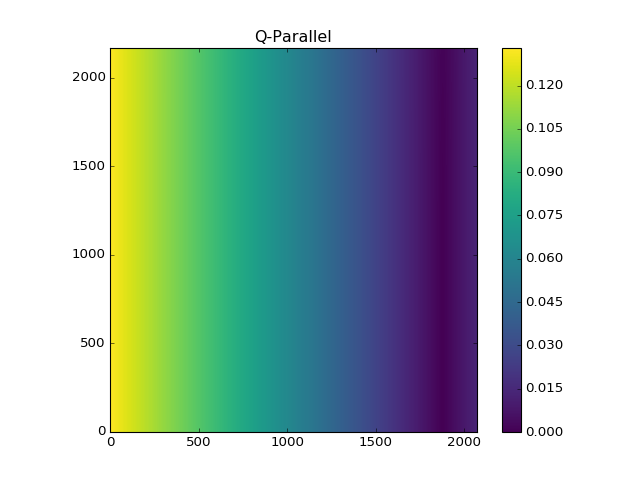

In [58]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(qr, origin='lower' ,cmap='viridis',vmin=qr.min(),vmax= qr.max() )
fig.colorbar(im)
ax.set_title( 'Q-Parallel')
plt.show()

<IPython.core.display.Javascript object>


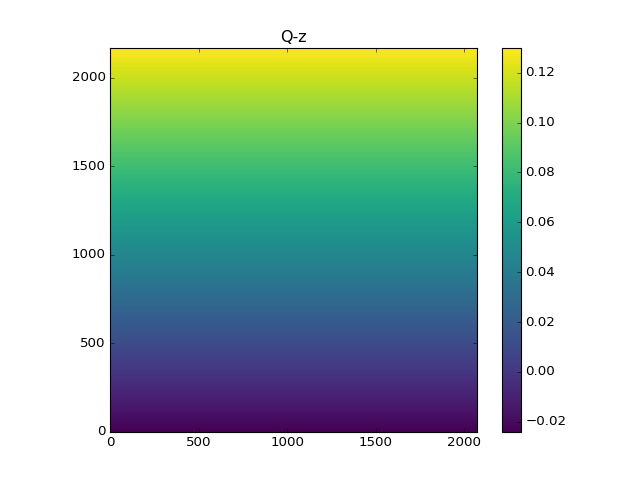

In [60]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(qz, origin='lower' ,cmap='viridis',vmin=qz.min(),vmax= qz.max() )
fig.colorbar(im)
ax.set_title( 'Q-z')
plt.show()

# get GiSAXS label array

<IPython.core.display.Javascript object>


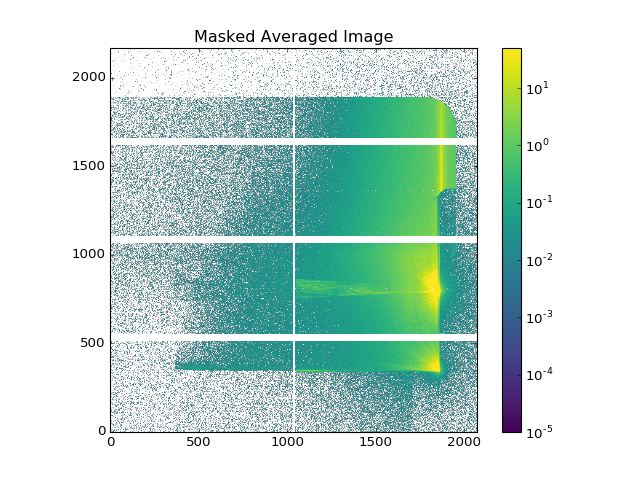

In [61]:
fig, ax = plt.subplots()
im = ax.imshow(avg_img, cmap='viridis', origin = 'lower',  norm= LogNorm( vmin=0.00001, vmax=.5e2 ) )
ax.set_title("Masked Averaged Image")
fig.colorbar(im)
plt.show()

# Get q||-intensity

In [62]:
#bin_img = 500
#Nbin = int( len(imgs)/bin_img )
#[ (i*bin_img, (i+1)*bin_img) for i in range(Nbin)               ]
#ave_img_series =  [   average_img( imgsr,i, i*bin_img )    for i in range(Nbin)                ]

In [63]:
vert_rect = ( ( 850, 0, 980- 850, 1600-0) , ( 570, 0, 700- 570, 1600-0) )    #(y,x, hight, wdith)

<IPython.core.display.Javascript object>


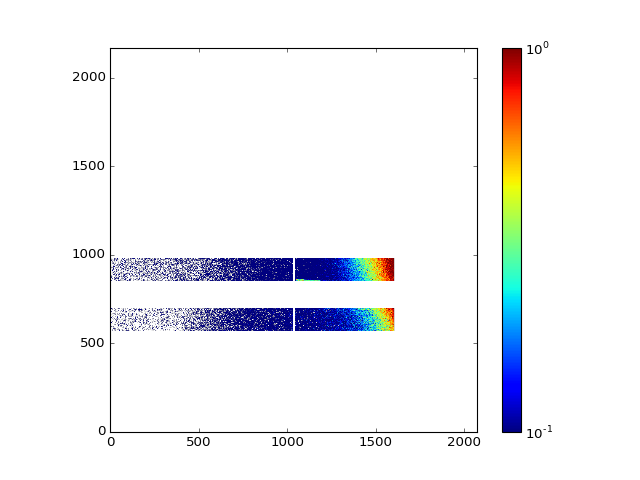

<IPython.core.display.Javascript object>


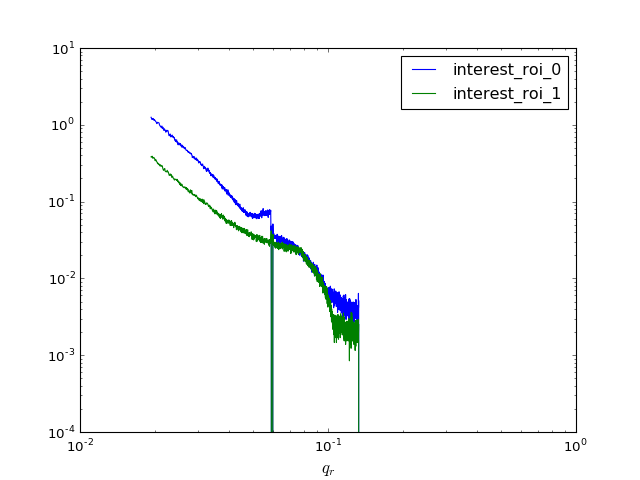

0 (850, 0, 130, 1600)
1 (570, 0, 130, 1600)


In [64]:
get_qr_intensity( qr, avg_img, vert_rect, show_roi=True)

In [67]:
qz_start = qz[670,0]
qz_end = qz[950,0]
qz_num= 2


qr_start =  qr[600,1700]
qr_end = qr[600,0]
qr_num = 15

In [68]:
qr_edge, qr_center = get_qedge(qr_start , qr_end, ( qr_end- qr_start)/qr_num, qr_num )

In [69]:
qz_edge, qz_center = get_qedge( qz_start,   qz_end,   (qz_end - qz_start)/(qz_num -0) , qz_num )

In [70]:
label_array_qz = get_qmap_label( qz, qz_edge)
label_array_qr = get_qmap_label( qr, qr_edge)
label_array_qzr,qzc,qrc = get_qzrmap(label_array_qz, label_array_qr,qz_center, qr_center  )

In [71]:
labels_qzr, indices_qzr = roi.extract_label_indices( label_array_qzr  )
labels_qz, indices_qz = roi.extract_label_indices( label_array_qz  )
labels_qr, indices_qr = roi.extract_label_indices( label_array_qr  )

In [72]:
num_qz = len(np.unique( labels_qz ))
num_qr = len(np.unique( labels_qr ))
num_qzr = len(np.unique( labels_qzr ))

In [73]:
num_qz,num_qr,num_qzr


(2, 15, 30)

<IPython.core.display.Javascript object>


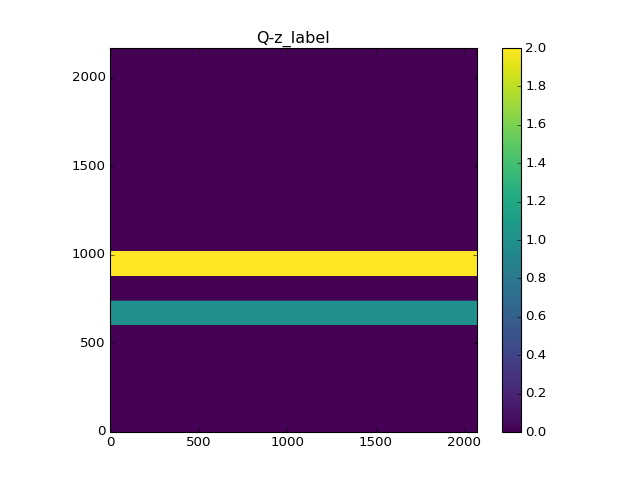

In [74]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(label_array_qz, origin='lower' ,cmap='viridis',vmin=0,vmax= None )
fig.colorbar(im)
ax.set_title( 'Q-z_label')
plt.show()

<IPython.core.display.Javascript object>


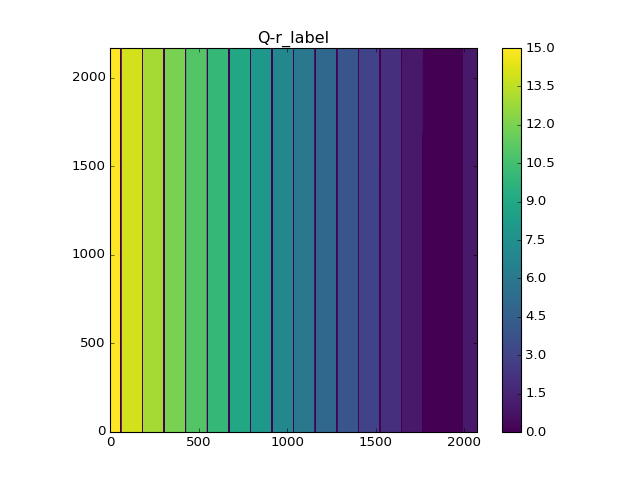

In [75]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(label_array_qr, origin='lower' ,cmap='viridis',vmin=0,vmax= None )
fig.colorbar(im)
ax.set_title( 'Q-r_label')
plt.show()

<IPython.core.display.Javascript object>


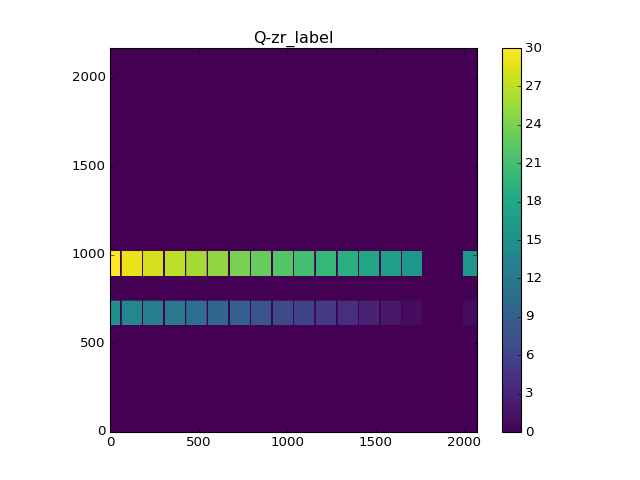

In [76]:
if True:
    fig, ax = plt.subplots()
    #im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
    im=ax.imshow(label_array_qzr, origin='lower' ,cmap='viridis',vmin=0,vmax= None )
    fig.colorbar(im)
    ax.set_title( 'Q-zr_label')
    plt.show()

In [83]:
boxes = label_array_qzr 
box_mask = boxes*mask
labels, indices = roi.extract_label_indices(box_mask)

## Number of pixels in each q ring

In [78]:
#ring_mask

In [79]:
nopr = np.bincount( np.array(labels, dtype=int) )[1:]
nopr

array([27383, 15846, 15707, 15707, 15846, 15290, 15846, 15707, 15707,
       15846, 15707, 15846, 15707, 15846,  7923, 27777, 16074, 15933,
       15933, 16074, 15510, 16073, 15933, 15933, 16056, 15933, 16074,
       15933, 16074,  8037])

# check one_qz_qr_region

In [80]:
#%run develop.py

<IPython.core.display.Javascript object>


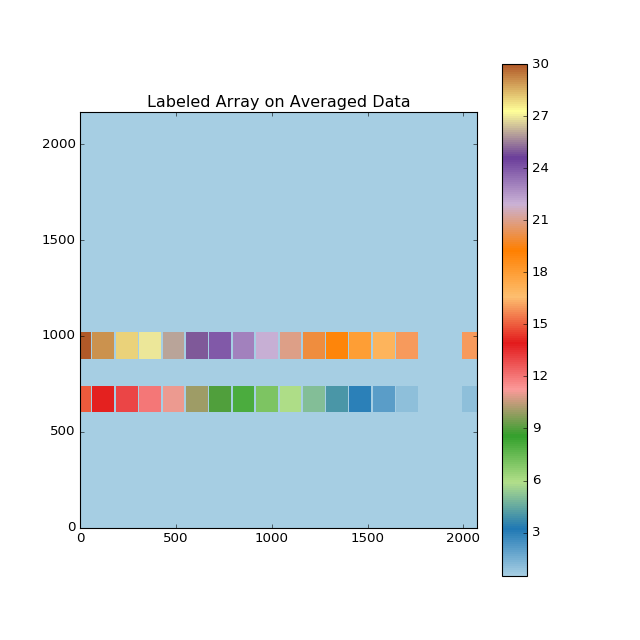

In [81]:

# plot the figure
fig, axes = plt.subplots(figsize=(8,8))
axes.set_title("Labeled Array on Averaged Data")
im,im_label = show_label_array_on_image(axes, avg_img, box_mask, imshow_cmap='viridis',
                        cmap='Paired',
                         vmin=0.01, vmax=30. ,  origin="lower")
#rwidth = 200 
#x1,x2 = [center[1] - rwidth, center[1] + rwidth]
#y1,y2 = [center[0] - rwidth, center[0] + rwidth]
#axes.set_xlim( [x1,x2])
#axes.set_ylim( [y1,y2])

#fig.colorbar(im)
fig.colorbar(im_label)
plt.show()

##  Kymograph(waterfall plot) of the box

In [84]:
#kymo = roi.kymograph(imgsr[::100], box_mask, num = 1)

In [85]:
if False:
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_ylabel('Pixel')
    ax.set_xlabel('Frame')
    ax.set_title('Kymograph')

    im = ax.imshow(kymo.T, cmap='viridis', vmax=10)
    #fig.colorbar( im   )
    ax.set_aspect(0.002)
    plt.show()

##  Mean intensities for each interested qz_qr

In [86]:
#imgsr = Reverse_Coordinate(imgs, mask)    
#masker = Masker( imgsr, mask)

In [87]:
def mean_intensity(images, labeled_array, index=None):
    import scipy.ndimage.measurements as ndim
    """Compute the mean intensity for each ROI in the image list

    Parameters
    ----------
    images : list
        List of images
    labeled_array : array
        labeled array; 0 is background.
        Each ROI is represented by a nonzero integer. It is not required that
        the ROI labels are contiguous
    index : int, list, optional
        The ROI's to use. If None, this function will extract averages for all
        ROIs

    Returns
    -------
    mean_intensity : array
        The mean intensity of each ROI for all `images`
        Dimensions:
            len(mean_intensity) == len(index)
            len(mean_intensity[0]) == len(images)
    index : list
        The labels for each element of the `mean_intensity` list
    """
    if labeled_array.shape != images[0].shape[0:]:
        raise ValueError(
            "`images` shape (%s) needs to be equal to the labeled_array shape"
            "(%s)" % (images[0].shape, labeled_array.shape))
    # handle various input for `index`
    if index is None:
        index = list(np.unique(labeled_array))
        index.remove(0)
    try:
        len(index)
    except TypeError:
        index = [index]
    # pre-allocate an array for performance
    # might be able to use list comprehension to make this faster
    #mean_intensity = np.zeros((images.shape[0], len(index)))
    mean_intensity = np.zeros(( len(images), len(index)))
    for n, img in enumerate(images):
        # use a mean that is mask-aware
        mean_intensity[n] = ndim.mean(img, labeled_array, index=index)
    return mean_intensity, index

In [88]:

imgsr = Reverse_Coordinate(imgs, mask)  
imgsr

In [89]:
Nm=10000

start_time = time.time()
mask_data = imgsr[::Nm]  #make  masker[::1] will be very slow!
mean_int_sets, index_list = roi.mean_intensity(mask_data, box_mask)
elapsed_time = time.time() - start_time
print ('Total time: %.2f min' %(elapsed_time/60.))

Total time: 0.01 min


(2,) (2,)


<IPython.core.display.Javascript object>


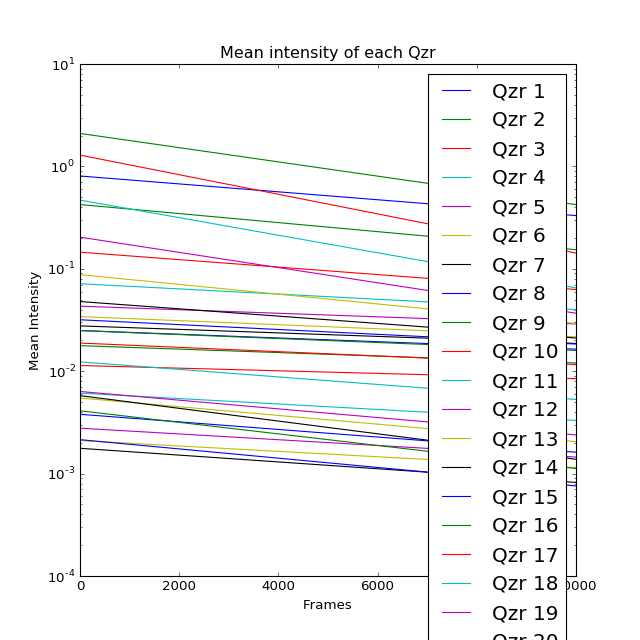

In [90]:
if True:
    times = np.arange( len(mean_int_sets)  )*Nm  # get the time for each frame

    print (times.shape, mean_int_sets[:,1].shape)
    #%matplotlib inline
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title("Mean intensity of each Qzr")
    for i in range(num_qzr):
        ax.plot(times, mean_int_sets[:,i], label="Qzr "+str(i+1))
        ax.set_xlabel("Frames")
        ax.set_ylabel("Mean Intensity")
        ax.set_yscale('log')
    ax.legend(fontsize=18) 
    plt.show()

## One time Correlation

Note : Enter the number of levels and number of buffers for Muliti tau one time correlation
number of buffers has to be even. More details in https://github.com/scikit-xray/scikit-xray/blob/master/skxray/core/correlation.py

In [ ]:
#ring_mask = np.array( ring_mask, dtype=int)

In [ ]:
good_start = 0
good_end = 100 #2499
#good_end = 6500

In [ ]:
imgs_ =imgs[good_start: good_end-1]

In [ ]:
imgsr2 = Reverse_Coordinate(imgs_, mask)    

In [ ]:
num_lev = 9  
num_buf = 8

g2, lag_steps = corr.multi_tau_auto_corr(num_lev, num_buf,  ring_mask, imgsr2)

In [ ]:
lags = lag_steps*timeperframe

In [ ]:
lag_steps

In [ ]:
g2.shape

In [ ]:
lag_steps.shape

In [ ]:
np.save( path + 'g2_%s-%s--%s'%(uid,good_start, good_end), g2)

In [ ]:
num_qr, num_qz, num_qzr

### Plot the one time correlation functions

In [ ]:

for qz_ind in range(num_qz):
    fig = plt.figure(figsize=(10, 8))
    title_qz = ' Qz= %.5f  '%( qz_center[qz_ind]) + r'$\AA^{-1}$' 
    plt.title('uid= %s:--->'%uid + title_qz,fontsize=20, y =1.1) 
    #print (qz_ind,title_qz)
    plt.axis('off')
    sx = int(round(np.sqrt(num_qr)) )
    if num_qr%sx == 0: 
        sy = int(num_qr/sx)
    else:
        sy=int(num_qr/sx+1) 
    for sn in range(num_qr):
        ax = fig.add_subplot(sx,sy,sn+1 )
        ax.set_ylabel("g2") 
        ax.set_title(" Qr= " + '%.5f  '%( qr_center[sn]) + r'$\AA^{-1}$')
        y=g2[:, sn + qz_ind * num_qr]
        ax.semilogx(lags, y, '-o', markersize=6) 
        ax.set_ylim([min(y)*.95, max(y[1:])*1.05 ])
    plt.show()
    fig.tight_layout()  


#np.save( path + 'g2_%s--%s'%(good_start, good_end), [lags,g2])
#lags,g2 = np.load( path + 'g2_%s--%s.npy'%(good_start, good_end) )

    

# Two time correlation

In [ ]:
#%run develop.py

In [91]:
t0 = time.time()
def run_time(t0):
    elapsed_time = time.time() - t0
    print ('Total time: %.2f min' %(elapsed_time/60.))   
  

In [92]:
t0 = time.time()
#data = imgsr[::100]
run_time( t0 )

Total time: 0.00 min


In [94]:
#dly = delays( num_lev=3, num_buf=4, time = 1  )

In [ ]:
#from two_time import *


In [96]:
good_start= 0
good_end = 100
imgs_ =imgs[good_start: good_end-1]
imgsr = Reverse_Coordinate(imgs_, mask) 

In [97]:
imgs_ =imgs[good_start: good_end-1]

In [98]:
imgsr = Reverse_Coordinate(imgs_, mask)    

In [99]:
%run develop.py
%run two_time.py

# A test of g12 calculation speed

In [95]:
def get_box_mask( qr_num):
    qz_start = qz[670,0]
    qz_end = qz[950,0]
    qz_num= 2

    qr_start =  qr[600,1700]
    qr_end = qr[600,0]
    qr_num = qr_num
    print ('The total q-num is: %s'%(qr_num*qz_num))

    qr_edge, qr_center = get_qedge(qr_start , qr_end, ( qr_end- qr_start)/qr_num, qr_num )
    qz_edge, qz_center = get_qedge( qz_start,   qz_end,   (qz_end - qz_start)/(qz_num -0) , qz_num )
    label_array_qz = get_qmap_label( qz, qz_edge)
    label_array_qr = get_qmap_label( qr, qr_edge)
    label_array_qzr,qzc,qrc = get_qzrmap(label_array_qz, label_array_qr,qz_center, qr_center  )
    boxes_mask = label_array_qzr *mask
    return boxes_mask



In [ ]:
dly = delays(8,8)

In [ ]:
delays?

In [ ]:
dly

In [ ]:
g12,tm = autocor_two_time( num_buf= 30,  ring_mask=get_box_mask(18),
                       imgs = imgsr,  start_img= 0, end_img= None  )

In [ ]:
g12,tm = autocor_two_time( num_buf= 2,  ring_mask=get_box_mask(18),
                       imgs = imgsr,  start_img= 0, end_img= None  )

In [ ]:
g12,tm = autocor_two_time( num_buf= 30,  ring_mask=get_box_mask(18),
                       imgs = imgs[0:100],  start_img= 0, end_img= None  )

In [ ]:
g12,tm = autocor_two_time( num_buf= 30,  ring_mask=get_box_mask(18),
                       imgs = data,  start_img= 0, end_img= None  )

In [ ]:
good_start= 0
good_end = 1000
imgs_ =imgs[good_start: good_end-1]
imgsr = Reverse_Coordinate(imgs_, mask) 

In [ ]:
g12,tm = autocor_two_time( num_buf= 30,  ring_mask=get_box_mask(18),
                       imgs = imgsr,  start_img= 0, end_img= None  )

In [ ]:
g12,tm = autocor_two_time( num_buf= 30,  ring_mask=get_box_mask(18),
                       imgs = imgs_,  start_img= 0, end_img= None  )

In [ ]:
t0 = time.time()
#data = imgsr[::100]
data = imgsr[::1]
run_time( t0 )

In [ ]:
g12,tm = autocor_two_time( num_buf= 30,  ring_mask=get_box_mask(18),
                       imgs = data,  start_img= 0, end_img= None  )

In [ ]:
t0 = time.time()
#data = imgsr[::100]
data = imgsr[::1]
run_time( t0 )

In [ ]:
data.shape

In [ ]:
data[0]

In [ ]:
imgs[0:100]

In [ ]:
g12,tm = autocor_two_time(num_lev=1, num_buf= 50,  ring_mask=get_box_mask(18),
                       imgs = imgsr,  start_img= 0, end_img= None  )

In [ ]:
num_buf=  4

In [ ]:
qs = range(2,100,6)

In [ ]:
qs

In [ ]:
g12 = autocor_two_time(num_lev=10, num_buf= num_buf,  ring_mask=box_mask,
                       imgs = imgsr,  start_img= 0, end_img= None  )
#np.save( path + 'g12_%s_%s_%s--buf=%s'%(uid ,good_start, good_end, num_buf), g12)

# for buf=4, noqs = 36

In [ ]:
qz_start = qz[670,0]
qz_end = qz[950,0]
qz_num= 2

qr_start =  qr[600,1700]
qr_end = qr[600,0]
qr_num = 18

qr_edge, qr_center = get_qedge(qr_start , qr_end, ( qr_end- qr_start)/qr_num, qr_num )
qz_edge, qz_center = get_qedge( qz_start,   qz_end,   (qz_end - qz_start)/(qz_num -0) , qz_num )
label_array_qz = get_qmap_label( qz, qz_edge)
label_array_qr = get_qmap_label( qr, qr_edge)
label_array_qzr,qzc,qrc = get_qzrmap(label_array_qz, label_array_qr,qz_center, qr_center  )
boxes_mask = label_array_qzr *mask

In [ ]:
g12 = autocor_two_time(num_lev=10, num_buf= num_buf,  ring_mask=box_mask,
                       imgs = imgs_,  start_img= 0, end_img= None  )
#np.save( path + 'g12_%s_%s_%s--buf=%s'%(uid ,good_start, good_end, num_buf), g12)

# for buf=20, noqs = 36

In [ ]:
num_buf=  20

In [ ]:
qz_start = qz[670,0]
qz_end = qz[950,0]
qz_num= 2

qr_start =  qr[600,1700]
qr_end = qr[600,0]
qr_num = 18

qr_edge, qr_center = get_qedge(qr_start , qr_end, ( qr_end- qr_start)/qr_num, qr_num )
qz_edge, qz_center = get_qedge( qz_start,   qz_end,   (qz_end - qz_start)/(qz_num -0) , qz_num )
label_array_qz = get_qmap_label( qz, qz_edge)
label_array_qr = get_qmap_label( qr, qr_edge)
label_array_qzr,qzc,qrc = get_qzrmap(label_array_qz, label_array_qr,qz_center, qr_center  )
boxes_mask = label_array_qzr *mask

In [ ]:
g12 = autocor_two_time(num_lev=10, num_buf= num_buf,  ring_mask=box_mask,
                       imgs = imgs_,  start_img= 0, end_img= None  )


In [ ]:
# for buf=20, noqs = 36

In [ ]:
nopr

In [ ]:
def interp_zeros(  data ): 
    from scipy.interpolate import interp1d
    gf = data.ravel() 
    indice, = gf.nonzero() 
    start, stop = indice[0], indice[-1]+1 
    dx,dy = data.shape 
    x=np.arange( dx*dy ) 
    f = interp1d(x[indice], gf[indice]) 
    gf[start:stop] = f(x[start:stop]) 
    return gf.reshape([dx,dy]) 
 

 

In [ ]:

#g12 = np.load( path + 'g12_%s_%s_%s--buf=%s.npy'%(uid, good_start, good_end,num_buf))

In [ ]:
N12 = 18

data = g12[:,:,N12]
data = interp_zeros( data )

fig, ax = plt.subplots()
im=ax.imshow( data, origin='lower' , cmap='viridis', 
             norm= LogNorm( vmin=1.0, vmax= 1.2 ) )
fig.colorbar(im)
plt.show()

In [ ]:
N12 = 18

fig, ax = plt.subplots()
im=ax.imshow(g12[:,:,N12], origin='lower' , cmap='viridis', 
             norm= LogNorm( vmin=1.0, vmax= 1.2 ) )
fig.colorbar(im)
plt.show()

In [ ]:
%run two_time.py

In [ ]:
    good_start= 0
    good_end = 1000
    imgs_ =imgs[good_start: good_end-1]
    imgsr = Reverse_Coordinate(imgs_, mask)

In [ ]:
box_mask=get_box_mask(5)

In [ ]:
qind, pixelist = roi.extract_label_indices(   box_mask  )

In [ ]:
seg1 =   Get_Pixel_Array( imgsr, pixelist).get_data()

In [ ]:
seg1.shape

In [ ]:
g12 = autocor_arrays_two_time( seg1, pixelist,qind, seg2=None,                         
                            get_half=True,get_whole =True, up_half= True,
            print_=True,    )

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("G12_1000_Frames")
i= 5
vmin =  g12[:,:,i].min() +.0001
vmax=g12[:,:,i].max()

im = ax.imshow(g12[:,:,i], cmap='viridis',  origin="lower",
               norm= LogNorm(vmin,vmax))
               #vmin=vmin,vmax=vmax,)
fig.colorbar(im) 
plt.show()

In [ ]:
%run two_time.py
%run develop.py

In [ ]:
    good_start= 0
    good_end = 500
    imgs_ =imgs[good_start: good_end-1]
    imgsr = Reverse_Coordinate(imgs_, mask)

In [ ]:
box_mask=get_box_mask(  15 )
qind, pixelist = roi.extract_label_indices(   box_mask  )


In [ ]:
if False:
    fig, axes = plt.subplots(figsize=(8,8))
    axes.set_title("Labeled Array on Averaged Data")
    im,im_label = show_label_array_on_image(axes, avg_img, box_mask, imshow_cmap='viridis',
                        cmap='Paired',   vmin=0.01, vmax=30. ,  origin="lower")

    fig.colorbar(im_label)
    plt.show()

In [ ]:
seg1 =   Get_Pixel_Array( imgsr, pixelist).get_data()

In [ ]:
seg1.shape

In [ ]:
g12 = autocor_arrays_two_time( seg1, pixelist,qind, seg2=None,                         
                            get_half=True,get_whole =True, up_half= True,
            print_=True,    )

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("G12_500_Frames")
i= 16
vmin =  g12[:,:,i].min() +.0001
vmax=g12[:,:,i].max()

im = ax.imshow(g12[:,:,i], cmap='viridis',  origin="lower",
               norm= LogNorm(vmin,vmax))
               #vmin=vmin,vmax=vmax,)
fig.colorbar(im) 
plt.show()

In [ ]:
%run two_time.py
%run develop.py

In [ ]:
good_start= 0
good_end = 100
imgs_ =imgs[good_start: good_end-1]
imgsr = Reverse_Coordinate(imgs_, mask=None)
box_mask=get_box_mask(  15 )
qind, pixelist = roi.extract_label_indices(   box_mask  )
    
    

In [ ]:
seg1 =   Get_Pixel_Array( imgsr, pixelist).get_data()

In [ ]:
seg1.shape

In [ ]:
pixelist_q1 = pixelist[ np.where( qind ==1)[0] ]

In [ ]:
seg_q1 =   Get_Pixel_Array( imgsr, pixelist_q1).get_data()

In [ ]:
nopr_q1 = len(pixelist_q1)

In [ ]:
sum1 = (np.average( seg_q1, axis=1)).reshape( 1, seg_q1.shape[0]   )  

In [ ]:
np.average( seg_q1[0]  )

In [ ]:
sum1[0,0]

In [ ]:
sum1 == sum2.T

In [ ]:
sum2 = (np.average( seg_q1, axis=1)).reshape(   seg_q1.shape[0],1   ) 

In [ ]:
sum3 = (   ( np.sum( seg1.T, axis=0) ).reshape(  seg1.shape[0] ,1  ) )/nopr_q1

In [ ]:
#sum2==sum3

In [ ]:
sum2.shape

In [ ]:
sum1.shape

In [ ]:
#seg_q1 =   Get_Pixel_Array( imgsr, pixelist_q1).get_data()

In [ ]:
seg_q1.shape

In [ ]:
#np.dot(   seg_q1, seg_q1.T)

In [ ]:
m= np.dot(   seg_q1, seg_q1.T)  /sum1  / sum2  / nopr_q1


In [ ]:
nopr_q1

In [ ]:
m

In [ ]:
m/g12[:,:,0]

In [ ]:
m

In [ ]:
g12[:,:,0]

In [ ]:
( m == g12[:,:,0] ).all()

In [ ]:
np.sum( m - g12[:,:,0] )  

In [ ]:
np.where( m - g12[:,:,0] >1E-14)

In [ ]:
g12 = autocor_arrays_two_time( seg1, pixelist,qind, seg2=None,                         
                            get_half=True,get_whole =True, up_half= True,
            print_=True,    )

In [ ]:
d.shape

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("G12_500_Frames")
i= 0
#d =  g12[:,:,i]

d=m

vmin = d.min() + 1E-9
vmax= d.max()


im = ax.imshow(d, cmap='viridis',  origin="lower",
               norm= LogNorm(vmin,vmax))
               #vmin=vmin,vmax=vmax,)
fig.colorbar(im) 
plt.show()

In [ ]:
x= np.array( [  [1,2,3,4],[5,6,7,8],[9,10,11,12] ] )

In [ ]:
x= np.array( [  [1,2,3,4] ])

In [ ]:
y=x.T

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
x

In [ ]:
y

In [ ]:
np.dot( x, y)

In [ ]:
t= x*y

In [ ]:
t

In [ ]:
t/ yy

In [ ]:
t/xx

In [ ]:
yy = (np.array( [1,2,3,4])).reshape( 4,1 )

In [ ]:
xx = ((np.array( [1,2,3,4]))).T.reshape( 1,4 )

In [ ]:
xx

In [ ]:
yy

In [ ]:
xx.shape

In [ ]:
yy.shape

In [ ]:
y*x

In [ ]:
g12L  = autocor_large_arrays_two_time( imgs_, pixelist, qind, divide= 4,  
                                     only_one_nodia=False,  get_whole=True,print_=True  )

In [ ]:
len( imgs_ )

In [ ]:
if False: 
    good_start= 0
    good_end = 501
    imgs_ =imgs[good_start: good_end-1]
    imgsr = Reverse_Coordinate(imgs_, mask)
    box_mask=get_box_mask(  15 )
    qind, pixelist = roi.extract_label_indices(   box_mask  )
    seg1 =   Get_Pixel_Array( imgsr, pixelist).get_data()

In [ ]:
g12 = autocor_arrays_two_time( seg1, pixelist,qind, seg2=None,                         
                            get_half=True,get_whole =True, up_half= True,
            print_=True,    )

In [ ]:
for i in range(30):
    print (  (g12[:,:,i] ==g12L[:,:,i]).all() )

In [ ]:
g12L.shape

In [ ]:
g12.shape

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("G12_500_Frames")
i= 16
vmin =  g12L[:,:,i].min() +.0001
vmax=g12L[:,:,i].max()

im = ax.imshow(g12[:,:,i], cmap='viridis',  origin="lower",
               norm= LogNorm(vmin,vmax))
               #vmin=vmin,vmax=vmax,)
fig.colorbar(im) 
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("G12_500_Frames")
i= 1
vmin =  g12[:,:,i].min() +.0001
vmax=g12[:,:,i].max()

im = ax.imshow(g12[:,:,i], cmap='viridis',  origin="lower",
               norm= LogNorm(vmin,vmax))
               #vmin=vmin,vmax=vmax,)
fig.colorbar(im) 
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("G12_1000_Frames")
i= 0
vmin = 13 # g12[:,:,i].min() +.0001
vmax= 16

im = ax.imshow(y1, cmap='viridis',  origin="lower",
               norm= LogNorm(vmin,vmax))
               #vmin=vmin,vmax=vmax,)
fig.colorbar(im) 
plt.show()